# 1. Multiprocessing in python

The **multiprocessing library** is Python's standard library to support parallel computing using processes.

See documentation here:

https://docs.python.org/3/library/multiprocessing.html

In [1]:
import multiprocessing as mp

Let's first print out the total number of CPUs that on my machine that can be used for parallel computing.

```
cat /proc/cpuinfo
```

In [2]:
print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 4


Let's use an example to show you how to use multiple cores in one machine to reduce the time of execution time. 

### Example 1:

Generate $10^7$ random numbers between 0 and 10, and square the number. Store the results in a list. 

#### A) Serial version:

Add random_square

In [4]:
import numpy as np
import time
import random_generator

In [14]:
# Timing code
start = time.time()

# Empty list for results
results = []

# Loop up to 10^7
for i in range(10000000):
    
    results.append(random_generator.random_generator(i))

# Time code again
end = time.time()

print(f"The execution time is {end - start} s.")

The execution time is 0.028612852096557617 s.


#### B) Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the **Pool** class.

See documentation:

https://superfastpython.com/multiprocessing-pool-map/

https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool


There are 4 common methods in the class that we may use often, that is:

1. **apply**, 


2. **map**, 


3. **apply_async** and 


4. **map_async**.

Have a look of the documentation for the differences, and we will only use **map** function below to parallel the above example.

The **map(func, iterable)** function takes in two arguments, and apply the function **func** to each element in the **iterable**, and then collect the results. 

In [15]:
# Timing code
start = time.time()

# Empty list for results
results = []

# Call Pool
n_cores = mp.cpu_count()//2
#print(type(n_cores))

# Define pool
pool = mp.Pool(processes = n_cores)

# Call Pool.map(func, iter)
results = [pool.map(random_generator.random_generator, range(10000000))]

# Time code again
end = time.time()

print(f"The execution time is {end - start} s.")

The execution time is 0.8149571418762207 s.


In [13]:
# Timing code
start = time.time()

# Empty list for results
results = []

# Call Pool
n_cores = mp.cpu_count()
#print(type(n_cores))

# Define pool
pool = mp.Pool(processes = n_cores)

# Call Pool.map(func, iter)
results = [pool.map(random_generator.random_generator, range(10000000))]

# Time code again
end = time.time()

print(f"The execution time is {end - start} s.")

The execution time is 27.68308401107788 s.


#### Notes:


- We can see that using the above parallel version of the code, we reduce the run time from 59.18333172798157 s to 30.407769918441772 s. This is a big gain in speed, especially if we have a heavy computation, it will reduce a lot of time by running parallel computing. 


- The `pool.apply` function is similar except that it can accept more arguments. The `pool.map` and `pool.apply` will lock the main program until all the processes are finished, which is quite useful if we want to obtain results in a particular order for some applications.


- In contrast, if we do not need the results in a particular order, we can also use `pool.apply_async` or `pool.map_async`, which will submit all processes at once and retrieve the results as soon as they are finished. Check documentation to learn more. 

## Visualise the execution time 

Let's visualise the execution time changes versus the number of data points using both the serial and parallel version.

We will see that until certain point, it is better to use the serial version. 

In [16]:
import matplotlib.pyplot as plt

In [17]:
# Serial function

def serial(n):
    
    start = time.time()
    results = []
    
    for i in range(n): 
        results.append(random_square.random_square(i))
    
    end = time.time()
    exec_time = end - start
    
    return exec_time

# Parallel function

def parallel(n):
    
    start = time.time()
    n_cpu = mp.cpu_count()

    pool = mp.Pool(processes=n_cpu)
    
    results = [pool.map(random_square.random_square, range(n))]
    
    end = time.time()
    exec_time = end - start
    
    return exec_time

In [18]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)


# Call functions for each n_run[i]

t_serial = [serial(int(n)) for n in n_run]

t_parallel = [parallel(int(n)) for n in n_run]

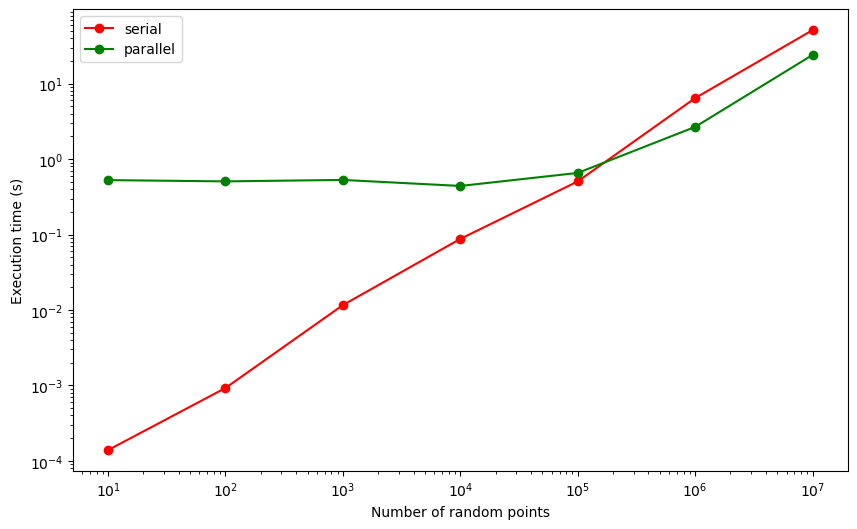

In [19]:
plt.figure(figsize = (10, 6))

plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()